In [1]:
import numpy as np
import tarfile
import os
import urllib
import matplotlib.pyplot as plt
from zlib import crc32
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
os.getcwd()

'C:\\Users\\user\\Documents\\AI\\Real-Life_ML'

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
housing_path = os.path.join('Datasets','housing')
housing_url = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_data(housing_url,housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_data(housing_url,housing_path)

In [5]:
import pandas as pd

def load_housing_data(housing_path):
    csv_path=os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [6]:
housing=load_housing_data(housing_path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


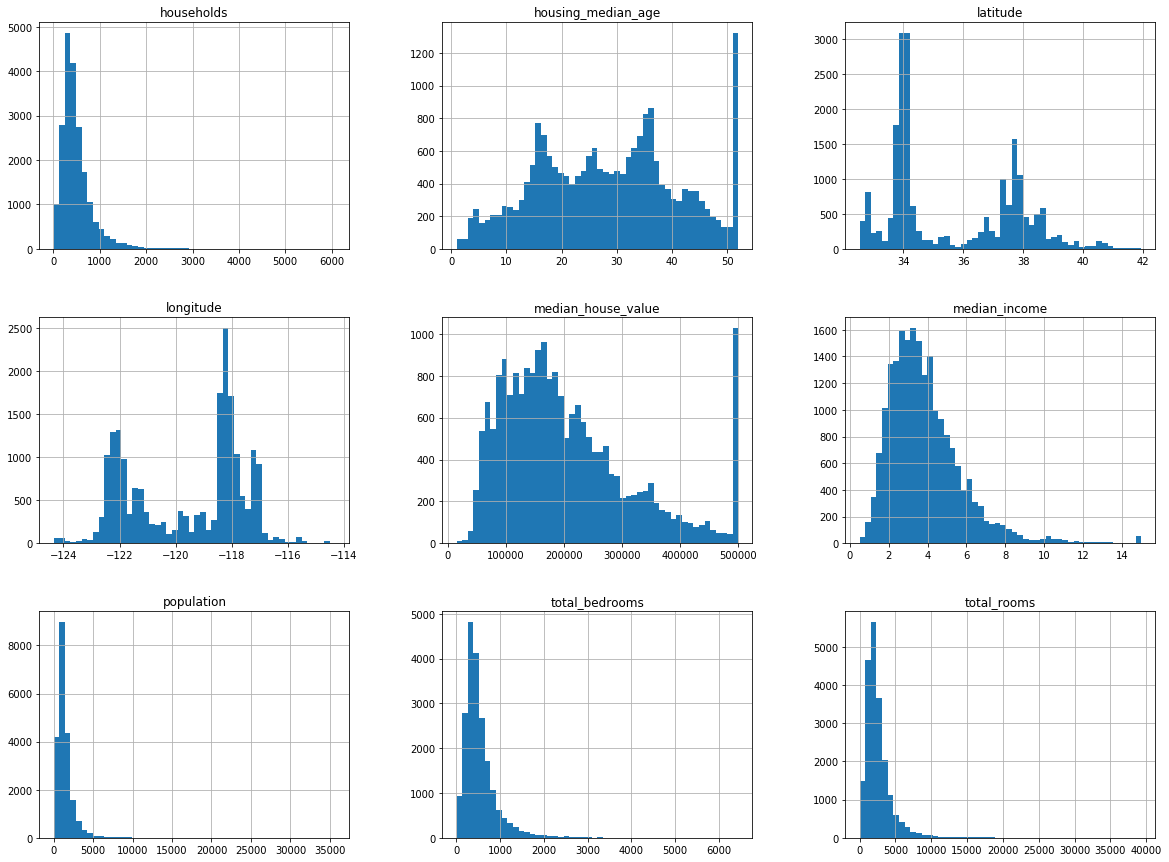

In [10]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


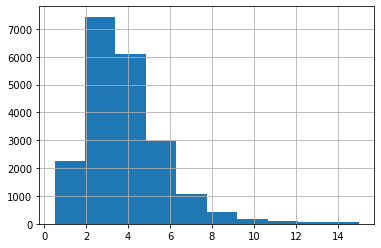

In [13]:
housing['median_income'].hist()

In [14]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0,1.5,3.,4.5,6.,np.inf],
                              labels=['A','B','C','D','E'])

In [15]:
housing['income_cat'].value_counts()

C    7236
B    6581
D    3639
E    2362
A     822
Name: income_cat, dtype: int64

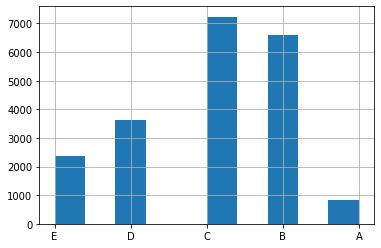

In [16]:
housing['income_cat'].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [18]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

C    0.350594
B    0.318859
D    0.176296
E    0.114402
A    0.039850
Name: income_cat, dtype: float64

In [19]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props=pd.DataFrame({
    'Overall':income_cat_proportions(housing),
    'Stratified':income_cat_proportions(strat_test_set),
    'Random':income_cat_proportions(test_set)
}).sort_index()

# % increase/decrease in the proportions
compare_props['% Rand Err']=100*compare_props['Random']/compare_props['Overall']-100
compare_props['% Stratified Err']=100*(compare_props['Stratified']/compare_props['Overall'])-100

In [20]:
compare_props

,Overall,Stratified,Random,% Rand Err,% Stratified Err
A,0.039826,0.039729,0.040213,0.973236,-0.243309
B,0.318847,0.318798,0.324370,1.732260,-0.015195
C,0.350581,0.350533,0.358527,2.266446,-0.013820
D,0.176308,0.176357,0.167393,-5.056334,0.027480
E,0.114438,0.114583,0.109496,-4.318374,0.127011


In [21]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [22]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


# Visualization

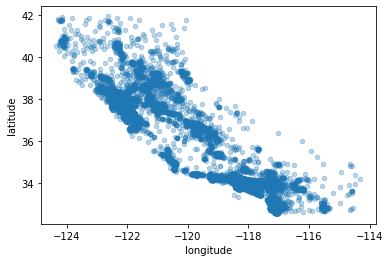

In [23]:
housing=strat_train_set.copy()
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.3)

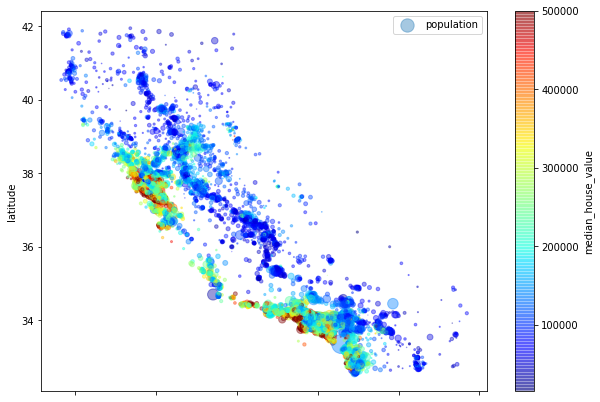

In [24]:
housing.plot(kind='scatter',x='longitude',y='latitude',
             s=housing['population']/100,c='median_house_value',label='population',
             cmap=plt.get_cmap('jet'),figsize=(10,7),colorbar=True,alpha=0.4)
plt.show()

In [25]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

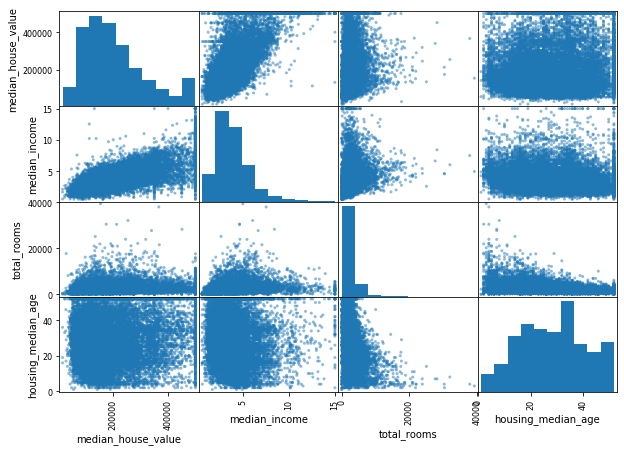

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['median_house_value','median_income','total_rooms','housing_median_age']],
              figsize=(10,7))
plt.show()

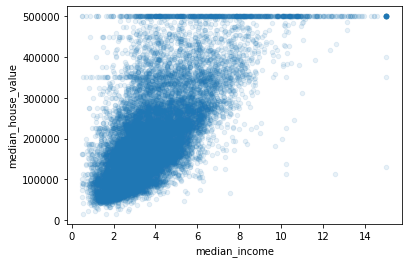

In [27]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)
plt.show()

In [28]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_rooms']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [29]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

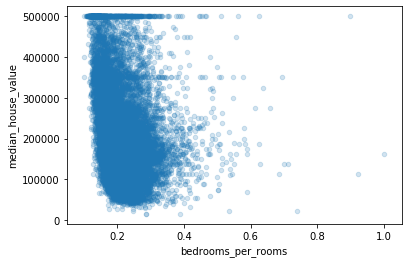

In [30]:
housing.plot(kind="scatter", x="bedrooms_per_rooms", y="median_house_value",
             alpha=0.2)
plt.show()

In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


#  Data Cleaning

In [32]:
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

In [33]:
sample_income_rows=housing[housing.isnull().any(axis=1)].head()
sample_income_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [34]:
sample_income_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [35]:
sample_income_rows.drop('total_bedrooms',axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [36]:
median=housing['total_bedrooms'].median()
sample_income_rows["total_bedrooms"].fillna(median,inplace=True)

In [37]:
sample_income_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [38]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median')

In [39]:
housing_num=housing.drop('ocean_proximity',axis=1)
# OR : houisng_num=housing.select_dtypes(include=[np.number])

In [40]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [41]:
imputer.strategy

'median'

In [42]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [43]:
X=imputer.transform(housing_num)

In [44]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,
                       index=housing.index)

In [45]:
housing_tr.loc[sample_income_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [46]:
housing_cat=housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [47]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded[:5]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.]])

In [48]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [50]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [52]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [54]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [55]:
from sklearn.compose import ColumnTransformer

num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']

full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

housing_prepared=full_pipeline.fit_transform(housing)

In [56]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [57]:
housing_prepared.shape

(16512, 16)

#  Model Preparation

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [60]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [61]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [62]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [64]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine Tuning of Model

In [65]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg,housing_prepared,housing_labels,
                      scoring='neg_mean_squared_error',cv=10)

# Becoz of greater is better in cross-validation
tree_rmse=np.sqrt(-scores)

In [66]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


In [67]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                           scoring='neg_mean_squared_error',cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798349


In [68]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [69]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [70]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49095.46668113 51037.5813354  51655.48545758 48417.82370553
 51746.31960951]
Mean: 50390.535357828376
Standard deviation: 1373.0049038192767


In [71]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

In [72]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = [ {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid=param_grid,
                           cv=5,scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [76]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [77]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [81]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)

64885.493395301135 {'max_features': 2, 'n_estimators': 3}
56062.41343392538 {'max_features': 2, 'n_estimators': 10}
52832.371921590544 {'max_features': 2, 'n_estimators': 30}
59809.68905161913 {'max_features': 4, 'n_estimators': 3}
53412.858817246844 {'max_features': 4, 'n_estimators': 10}
50284.960508013624 {'max_features': 4, 'n_estimators': 30}
59964.29809628598 {'max_features': 6, 'n_estimators': 3}
52264.72091312063 {'max_features': 6, 'n_estimators': 10}
49875.168851813265 {'max_features': 6, 'n_estimators': 30}
58751.390318766826 {'max_features': 8, 'n_estimators': 3}
51859.17117105836 {'max_features': 8, 'n_estimators': 10}
50096.8244048441 {'max_features': 8, 'n_estimators': 30}
62291.08431923492 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54366.68625585469 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59420.57380547774 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52408.093480788004 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [115]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.229267,0.014895,0.009584,0.000495,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.180232e+09,-4.246937e+09,...,-4.210127e+09,1.382196e+08,18,-1.184920e+09,-1.123972e+09,-1.117956e+09,-1.142191e+09,-9.888022e+08,-1.111568e+09,6.570284e+07
1,0.693619,0.067522,0.026783,0.004805,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.962437e+09,-3.209053e+09,...,-3.142994e+09,1.222803e+08,11,-6.136351e+08,-5.630095e+08,-5.852349e+08,-5.864461e+08,-5.820377e+08,-5.860727e+08,1.617849e+07
2,2.223224,0.153634,0.091164,0.011061,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.652072e+09,-2.851480e+09,...,-2.791260e+09,1.096686e+08,8,-4.372609e+08,-4.206675e+08,-4.177368e+08,-4.387129e+08,-4.241951e+08,-4.277147e+08,8.645225e+06
3,0.325130,0.032198,0.010182,0.001169,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.456596e+09,-3.637271e+09,...,-3.577199e+09,1.274335e+08,15,-9.934530e+08,-9.596758e+08,-9.252445e+08,-9.869756e+08,-9.091939e+08,-9.549086e+08,3.318578e+07
4,1.044294,0.079104,0.026160,0.002765,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.626551e+09,-2.953915e+09,...,-2.852933e+09,1.340959e+08,9,-5.361823e+08,-5.293277e+08,-5.254546e+08,-5.308586e+08,-5.308238e+08,-5.305294e+08,3.445228e+06
5,2.907881,0.437277,0.068786,0.008794,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.419006e+09,-2.562639e+09,...,-2.528577e+09,1.047871e+08,3,-3.911005e+08,-3.906813e+08,-3.879490e+08,-4.003178e+08,-3.796449e+08,-3.899387e+08,6.626444e+06
6,0.461115,0.031469,0.010580,0.000481,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.591428e+09,-3.776736e+09,...,-3.595717e+09,1.126140e+08,16,-9.307814e+08,-9.247502e+08,-9.181449e+08,-9.238700e+08,-9.188911e+08,-9.232875e+08,4.569746e+06
7,1.484763,0.170729,0.025161,0.003110,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.567482e+09,-2.800259e+09,...,-2.731601e+09,1.249374e+08,6,-5.156179e+08,-4.843886e+08,-4.813077e+08,-4.955074e+08,-5.154413e+08,-4.984526e+08,1.472195e+07
8,4.756029,0.233812,0.086538,0.004357,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.381016e+09,-2.541737e+09,...,-2.487532e+09,1.280648e+08,1,-3.927148e+08,-3.864732e+08,-3.789967e+08,-3.863757e+08,-4.003087e+08,-3.889738e+08,7.141741e+06
9,0.655566,0.029834,0.010776,0.000405,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.323296e+09,-3.390060e+09,...,-3.451726e+09,1.338380e+08,13,-9.056097e+08,-8.779728e+08,-8.840516e+08,-9.181640e+08,-9.009253e+08,-8.973447e+08,1.460515e+07


In [120]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={'n_estimators': randint(low=1,high=200),
           'max_features': randint(low=1, high=8)}
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                scoring='neg_mean_squared_error',
                                cv=5, n_iter=5, verbose=2)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] max_features=1, n_estimators=58 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. max_features=1, n_estimators=58, total=   3.6s
[CV] max_features=1, n_estimators=58 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] .................. max_features=1, n_estimators=58, total=   3.2s
[CV] max_features=1, n_estimators=58 .................................
[CV] .................. max_features=1, n_estimators=58, total=   3.7s
[CV] max_features=1, n_estimators=58 .................................
[CV] .................. max_features=1, n_estimators=58, total=   3.4s
[CV] max_features=1, n_estimators=58 .................................
[CV] .................. max_features=1, n_estimators=58, total=   3.3s
[CV] max_features=6, n_estimators=69 .................................
[CV] .................. max_features=6, n_estimators=69, total=  12.3s
[CV] max_features=6, n_estimators=69 .................................
[CV] .................. max_features=6, n_estimators=69, total=  10.2s
[CV] max_features=6, n_estimators=69 .................................
[CV] .................. max_features=6, n_estimators=69, total=   9.1s
[CV] max_features=6, n_estimators=69 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [125]:
cvres=rnd_search.cv_results_
for score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-score), params)

54834.940759296034 {'max_features': 1, 'n_estimators': 58}
49515.06090937159 {'max_features': 6, 'n_estimators': 69}
49845.4401656166 {'max_features': 4, 'n_estimators': 69}
49637.83729357157 {'max_features': 4, 'n_estimators': 161}
51883.20911295861 {'max_features': 2, 'n_estimators': 191}


In [88]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.39693987e-02, 7.28508700e-02, 4.11968156e-02, 1.76831164e-02,
       1.61983753e-02, 1.71167990e-02, 1.61611784e-02, 3.20940092e-01,
       6.36425353e-02, 1.10670037e-01, 7.40098166e-02, 1.23190151e-02,
       1.57261214e-01, 1.03418465e-04, 2.23552375e-03, 3.64179475e-03])

In [98]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder=full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes))

[(0.0001034184647581947, 'ISLAND'),
 (0.0022355237455196093, 'NEAR BAY'),
 (0.003641794746329205, 'NEAR OCEAN'),
 (0.012319015140894694, '<1H OCEAN'),
 (0.01616117838527832, 'households'),
 (0.016198375290223343, 'total_bedrooms'),
 (0.0171167990358776, 'population'),
 (0.01768311639764264, 'total_rooms'),
 (0.04119681556295216, 'housing_median_age'),
 (0.06364253531845993, 'rooms_per_hhold'),
 (0.07285086999474778, 'latitude'),
 (0.07396939865167217, 'longitude'),
 (0.07400981658439607, 'bedrooms_per_room'),
 (0.11067003669958012, 'pop_per_hhold'),
 (0.1572612139437983, 'INLAND'),
 (0.3209400920378699, 'median_income')]

#  Evaluate Final Model

In [101]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

In [104]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print('RMSE:',final_rmse)

RMSE: 47907.42599798622


In [126]:
from scipy  import stats

confidence= 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45877.57412528, 49854.70011828])

In [127]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [128]:
my_model = full_pipeline_with_predictor

In [130]:
import joblib

joblib.dump(my_model, "housing_model.pkl") 
my_model_loaded = joblib.load("housing_model.pkl")

In [131]:
my_model_loaded

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              